# Customer Purchase Behavior Classification
# Introduction
## Overview
This project aims to build a classification model to predict whether a customer will make a purchase (`PurchaseStatus`: 0 - No, 1 - Yes) based on various features such as demographic details, purchasing habits, and website usage.

## Dataset
The dataset(Synthetic) contains the following features:
- **Age:** Customer's age.
- **Gender:** Customer's gender (0: Male, 1: Female).
- **Annual Income:** Customer's annual income (in dollars).
- **Number of Purchases:** Total purchases made by the customer.
- **Product Category:** Category of purchased product (0: Electronics, 1: Clothing, etc.).
- **Time Spent on Website:** Time spent on the website (in minutes).
- **Loyalty Program:** Membership status in loyalty program (0: No, 1: Yes).
- **Discounts Availed:** Number of discounts availed (range: 0-5).
- **PurchaseStatus (Target):** Whether the customer made a purchase (0: No, 1: Yes).

## Objective
Develop a machine learning classification model to:
1. Understand key factors influencing purchase behavior.
2. Accurately predict purchase likelihood for new customers.

## Steps
1. **Data Preprocessing:** 
   - Handle missing values, encode categorical features, and scale numerical variables.
2. **Exploratory Data Analysis (EDA):**
   - Analyze feature distributions and relationships with `PurchaseStatus`.
3. **Model Training:** 
   - Train and evaluate models such as Logistic Regression, Decision Trees, and Gradient Boosting.
4. **Model Evaluation:** 
   - Assess performance using accuracy, precision, recall, F1-score, and ROC-AUC.
5. **Insights and Interpretation:**
   - Identify key features influencing customer purchase behavior.

## Deliverables
- Trained classification models and their performance metrics.
- Visualizations for feature importance and model evaluation.
- Actionable insights for understanding customer behavior.


# About the Dataset
Description:
This dataset contains comprehensive information on customer purchase behavior, aiming to assist in understanding the various factors that influence purchase decisions. It encompasses demographic details, purchasing habits, and other relevant features.

Features:
Age: Customer's age
Gender: Customer's gender (0: Male, 1: Female)
Annual Income: Annual income of the customer in dollars
Number of Purchases: Total number of purchases made by the customer
Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)
Time Spent on Website: Time spent by the customer on the website in minutes
Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)
Discounts Availed: Number of discounts availed by the customer (range: 0-5)
PurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)

Target Variable:
The target variable, PurchaseStatus, indicates the likelihood of a customer making a purchase, with the following distribution:
0 (No Purchase): 48%
1 (Purchase): 52%

# EDA

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load and Display the Dataset

In [15]:
df = pd.read_csv('C:\Users\somya\Somya Katoch\customer_purchase_data.csv')
df.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3878037777.py, line 1)

In [ ]:
df = pd.read_csv(
    r'C:\Users\somya\Somya Katoch\customer_purchase_data.csv'
)
df.head()


### Dataset Information

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


### Statistical Summary

In [17]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


### Check the shape of the dataset

In [ ]:
print(f"Dataset Shape: {df.shape}")

### Distribution of the target variable

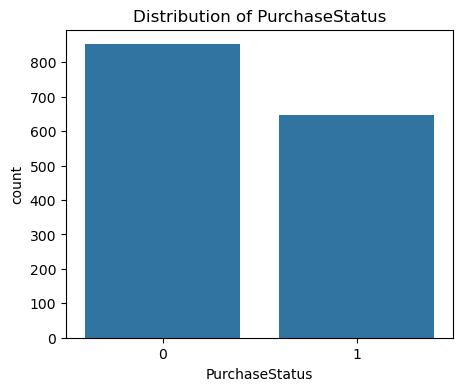

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(x='PurchaseStatus', data=df)
plt.title('Distribution of PurchaseStatus')
plt.show()

### Age Distribution 

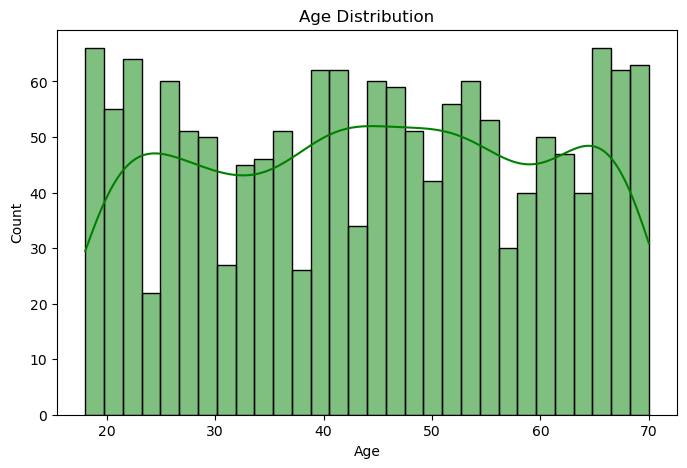

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='green')
plt.title('Age Distribution')
plt.show()


### Gender Distribution

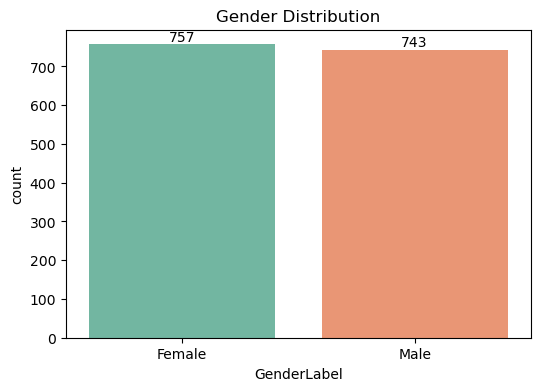

In [34]:
df['GenderLabel'] = df['Gender'].map({0: 'Male', 1: 'Female'})

plt.figure(figsize=(6,4))
ax = sns.countplot(x='GenderLabel', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title('Gender Distribution')
plt.show()


### Annual Income

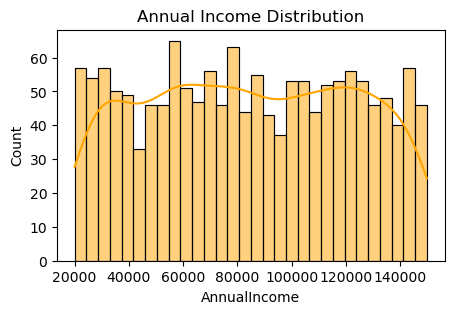

In [48]:
plt.figure(figsize=(5,3))
sns.histplot(df['AnnualIncome'], bins=30, kde=True , color = 'orange')
plt.title('Annual Income Distribution')
plt.show()

### Product Category distribution

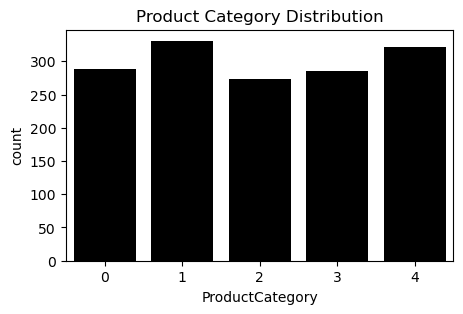

In [51]:
plt.figure(figsize=(5,3))
sns.countplot(x='ProductCategory', data=df, color = 'black')
plt.title('Product Category Distribution')
plt.show()

### Annual Income vs Purchase Status

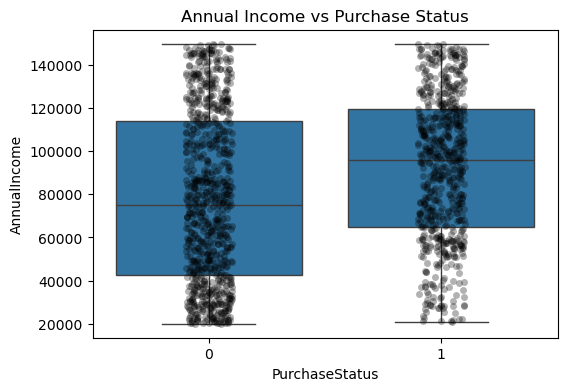

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(x='PurchaseStatus', y='AnnualIncome', data=df)
sns.stripplot(x='PurchaseStatus', y='AnnualIncome', data=df, color='black', alpha=0.3)
plt.title('Annual Income vs Purchase Status')
plt.show()


### Correlation heatmap

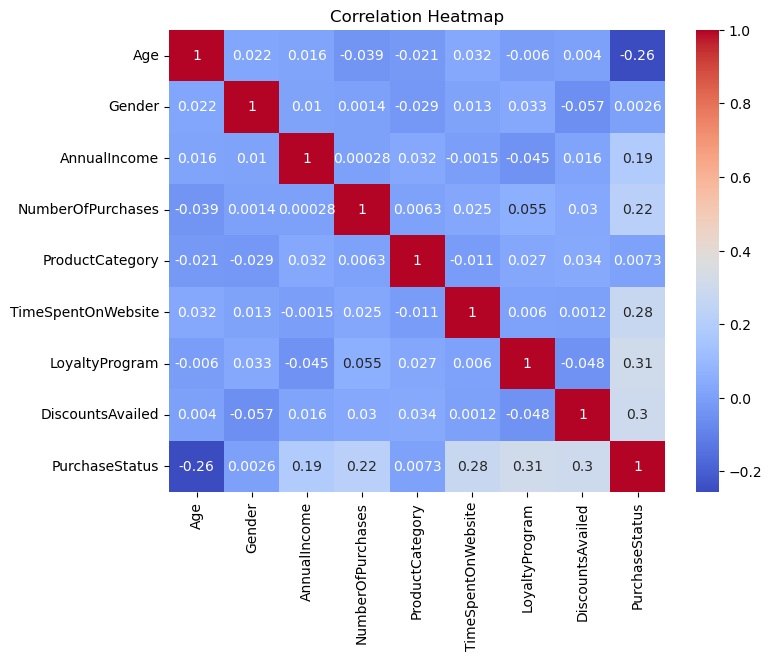

In [54]:
plt.figure(figsize=(8,6))

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()


# Data Pre-processing

### Check for missing values

In [55]:
print(df.isnull().sum())

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
GenderLabel           0
dtype: int64


### Split the data into features and target variable

In [57]:
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

### Scaling the features

In [59]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X.select_dtypes(include='number')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_cols)


### Split the data into training and testing sets

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models

**Decission Tree Classifier**

In [64]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [65]:
# Decision Tree Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

Decision Tree Classifier:
 Accuracy: 0.8966666666666666
 Precision: 0.9145299145299145
 Recall: 0.8359375
 F1 Score: 0.8734693877551021


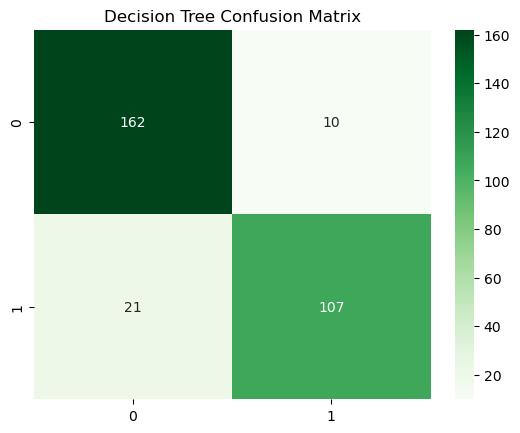

In [69]:
print(f'Decision Tree Classifier:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.show()

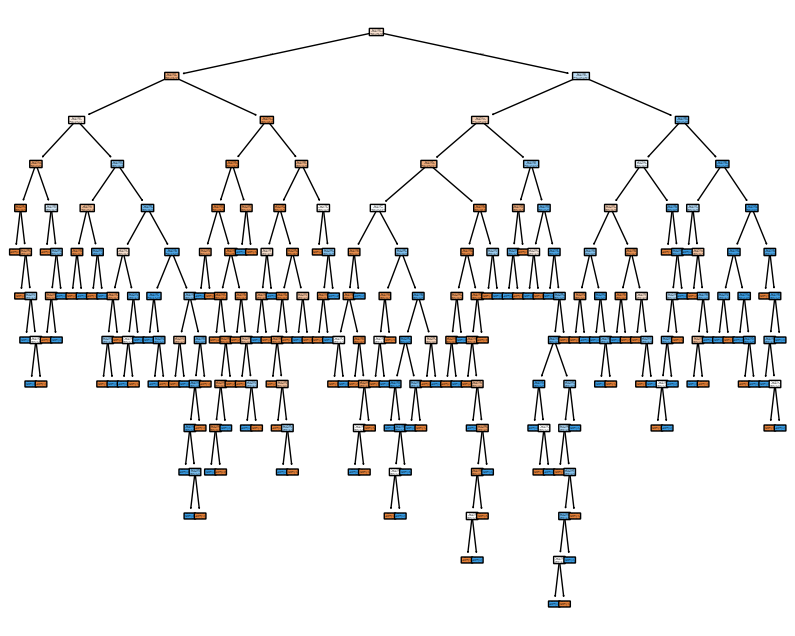

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(dt_model, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=y)
plt.show()